# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# JSON Traversal info
import json
from pprint import pprint

# Impor the OpenWeatherMap API key
from weatherpy_api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?"

for i, city in enumerate(cities):
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    print(city_url)

https://api.openweathermap.org/data/2.5/weather?q=newman&appid=01b6ff024d94e40d4f3d76349bd35ec6
https://api.openweathermap.org/data/2.5/weather?q=carnarvon&appid=01b6ff024d94e40d4f3d76349bd35ec6
https://api.openweathermap.org/data/2.5/weather?q=cumaribo&appid=01b6ff024d94e40d4f3d76349bd35ec6
https://api.openweathermap.org/data/2.5/weather?q=lebu&appid=01b6ff024d94e40d4f3d76349bd35ec6
https://api.openweathermap.org/data/2.5/weather?q=puerto ayora&appid=01b6ff024d94e40d4f3d76349bd35ec6
https://api.openweathermap.org/data/2.5/weather?q=grytviken&appid=01b6ff024d94e40d4f3d76349bd35ec6
https://api.openweathermap.org/data/2.5/weather?q=adamstown&appid=01b6ff024d94e40d4f3d76349bd35ec6
https://api.openweathermap.org/data/2.5/weather?q=beykonak&appid=01b6ff024d94e40d4f3d76349bd35ec6
https://api.openweathermap.org/data/2.5/weather?q=namibe&appid=01b6ff024d94e40d4f3d76349bd35ec6
https://api.openweathermap.org/data/2.5/weather?q=port-aux-francais&appid=01b6ff024d94e40d4f3d76349bd35ec6
https://api.

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

#     # Run an API request for each of the cities
    try:
#         # Parse the JSON and retrieve data
        city_weather_json = requests.get(city_url).json()
        
#pprint(city_weather_json)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['dt']

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping...{e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | newman
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | cumaribo
City not found. Skipping...'coord'
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | beykonak
Processing Record 9 of Set 1 | namibe
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | antsiranana
Processing Record 12 of Set 1 | pamandzi
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | antonio enes
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | mezhdurechenskiy
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | puerto san carlos
City not found. Skipping...'coord'
Processing Recor

Processing Record 34 of Set 4 | nar'yan-mar
Processing Record 35 of Set 4 | rey bouba
Processing Record 36 of Set 4 | tobi village
City not found. Skipping...'coord'
Processing Record 37 of Set 4 | lauro de freitas
Processing Record 38 of Set 4 | celestun
Processing Record 39 of Set 4 | isla mujeres
Processing Record 40 of Set 4 | lihue
Processing Record 41 of Set 4 | labuan bajo
Processing Record 42 of Set 4 | taiohae
City not found. Skipping...'coord'
Processing Record 43 of Set 4 | xilin hot
Processing Record 44 of Set 4 | shalqar
Processing Record 45 of Set 4 | vadso
Processing Record 46 of Set 4 | maua
Processing Record 47 of Set 4 | bagrationovsk
Processing Record 48 of Set 4 | acapulco de juarez
Processing Record 49 of Set 4 | mhamid
Processing Record 0 of Set 5 | vung tau
Processing Record 1 of Set 5 | prince rupert
Processing Record 2 of Set 5 | sept-iles
Processing Record 3 of Set 5 | fort mcmurray
Processing Record 4 of Set 5 | bozhou
Processing Record 5 of Set 5 | kidal
Pro

Processing Record 25 of Set 8 | malmberget
Processing Record 26 of Set 8 | macapa
Processing Record 27 of Set 8 | zeya
Processing Record 28 of Set 8 | sarupathar
Processing Record 29 of Set 8 | heunghae
Processing Record 30 of Set 8 | karratha
Processing Record 31 of Set 8 | amberieu-en-bugey
Processing Record 32 of Set 8 | vingt cinq
City not found. Skipping...'coord'
Processing Record 33 of Set 8 | starkville
Processing Record 34 of Set 8 | soto la marina
Processing Record 35 of Set 8 | devils lake
Processing Record 36 of Set 8 | pundong
Processing Record 37 of Set 8 | krasnokamsk
Processing Record 38 of Set 8 | kailua-kona
Processing Record 39 of Set 8 | ytyk-kyuyel'
City not found. Skipping...'coord'
Processing Record 40 of Set 8 | jutai
Processing Record 41 of Set 8 | kodinsk
Processing Record 42 of Set 8 | pudasjarvi
Processing Record 43 of Set 8 | maridi
Processing Record 44 of Set 8 | coronel dorrego
Processing Record 45 of Set 8 | lesozavodsk
Processing Record 46 of Set 8 | ki

Processing Record 12 of Set 12 | armacao de buzios
Processing Record 13 of Set 12 | lata
Processing Record 14 of Set 12 | ramanuj ganj
Processing Record 15 of Set 12 | boise
Processing Record 16 of Set 12 | santa terezinha
Processing Record 17 of Set 12 | saint-francois
Processing Record 18 of Set 12 | la junta
Processing Record 19 of Set 12 | san jose de feliciano
Processing Record 20 of Set 12 | buala
Processing Record 21 of Set 12 | el nido
Processing Record 22 of Set 12 | kingscliff
Processing Record 23 of Set 12 | yarega
Processing Record 24 of Set 12 | hassi messaoud
Processing Record 25 of Set 12 | sao jose da coroa grande
Processing Record 26 of Set 12 | lisakovsk
Processing Record 27 of Set 12 | brookings
Processing Record 28 of Set 12 | komsomol'skiy
Processing Record 29 of Set 12 | yagry
City not found. Skipping...'coord'
Processing Record 30 of Set 12 | broome
Processing Record 31 of Set 12 | shira
Processing Record 32 of Set 12 | puducherry
Processing Record 33 of Set 12 |

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,newman,37.3138,-121.0208,287.28,88,100,3.58,US,1708212339
1,carnarvon,-24.8667,113.6333,303.01,34,1,5.39,AU,1708212340
2,lebu,-37.6167,-73.6500,288.06,77,0,11.17,CL,1708212341
3,puerto ayora,-0.7393,-90.3518,297.90,100,75,2.24,EC,1708212341
4,grytviken,-54.2811,-36.5092,278.72,78,81,1.32,GS,1708212342


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")


# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,newman,37.3138,-121.0208,287.28,88,100,3.58,US,1708212339
1,carnarvon,-24.8667,113.6333,303.01,34,1,5.39,AU,1708212340
2,lebu,-37.6167,-73.6500,288.06,77,0,11.17,CL,1708212341
3,puerto ayora,-0.7393,-90.3518,297.90,100,75,2.24,EC,1708212341
4,grytviken,-54.2811,-36.5092,278.72,78,81,1.32,GS,1708212342


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

NameError: name 'date' is not defined

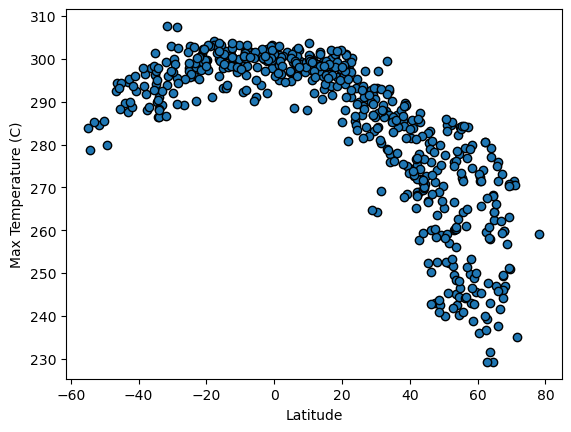

In [9]:
# Build scatter plot for latitude vs. temperature
x1 = city_data_df['Lat']
y1 = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x1, y1, edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature {date}")

# Save the figure
plt.savefig("../output_data/Fig1.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

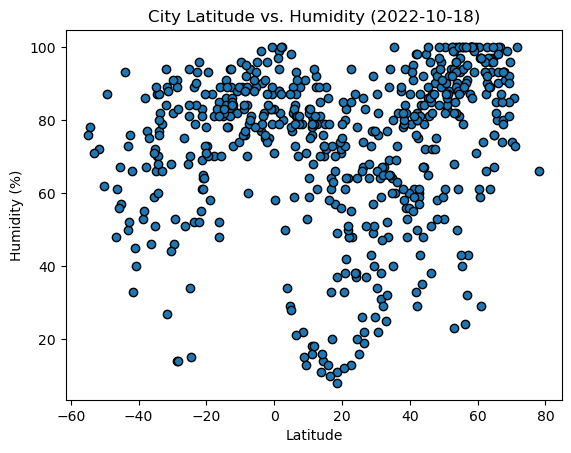

In [10]:
# Build the scatter plots for latitude vs. humidity
x2 = city_data_df['Lat']
y2 = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x2, y2, edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

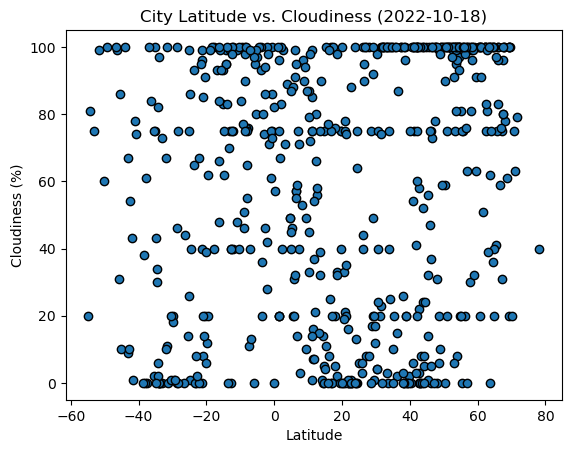

In [11]:
# Build the scatter plots for latitude vs. humidity
x3 = city_data_df['Lat']
y3 = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x3, y3, edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

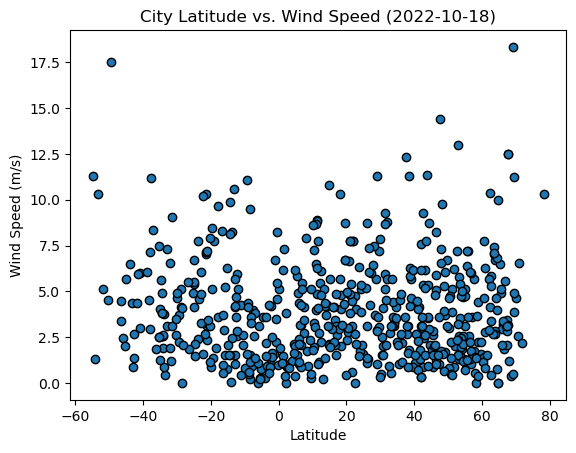

In [12]:
# Build the scatter plots for latitude vs. humidity
x4 = city_data_df['Lat']
y4 = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x4, y4, edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = pd.DataFrame(city_data_df)

southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,carnarvon,-24.8667,113.6333,303.01,34,1,5.39,AU,1708212340
2,lebu,-37.6167,-73.6500,288.06,77,0,11.17,CL,1708212341
3,puerto ayora,-0.7393,-90.3518,297.90,100,75,2.24,EC,1708212341
4,grytviken,-54.2811,-36.5092,278.72,78,81,1.32,GS,1708212342
5,adamstown,-25.0660,-130.1015,297.79,81,99,5.53,PN,1708212343


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = pd.DataFrame(city_data_df)

northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,newman,37.3138,-121.0208,287.28,88,100,3.58,US,1708212339
6,beykonak,36.3257,30.3030,287.00,73,15,2.17,TR,1708212343
11,isafjordur,66.0755,-23.1240,275.92,90,100,3.23,IS,1708212346
15,mezhdurechenskiy,59.6000,65.9333,245.64,100,91,1.60,RU,1708212348
16,bethel,41.3712,-73.4140,272.60,61,100,4.12,US,1708212293


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8254378352905087


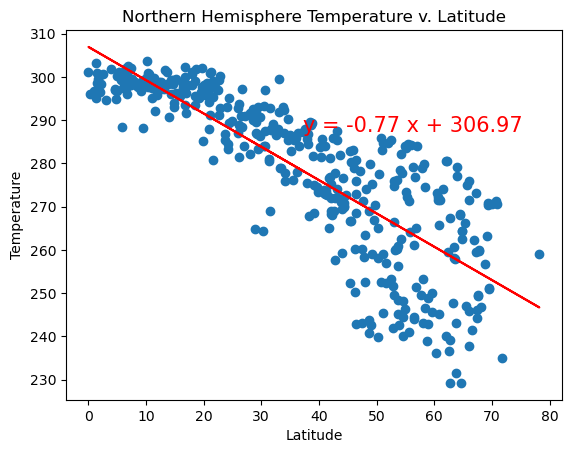

In [15]:
# Linear regression on Northern Hemisphere

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
print(f"The r-value is: {rvalue}")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Northern Hemisphere Temperature v. Latitude")
plt.annotate(line_eq,(x.iloc[0],y.iloc[0]),fontsize=15,color="red")
plt.show()

The r-value is: 0.6261664804202121


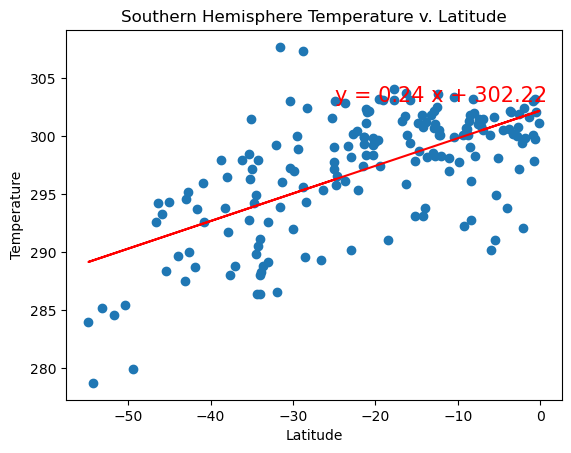

In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
print(f"The r-value is: {rvalue}")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Southern Hemisphere Temperature v. Latitude")
plt.annotate(line_eq,(x.iloc[0],y.iloc[0]),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 

From the Southern Hemisphere graph, we see that the lower the latitude below 0, the lower the temperature. From the Northern Hemisphere graph, we see that the higher the latitude above 0, the lower the temperature.  There is a moderate positive correlation as latitude moves towards 0 and a high negative correlation as latitude moves above 0.

Conclusion: The closer the city to the equator(0 degrees), the higher the temperature. Latitudes below and above 0 have lower temperatures, but as latitudes approach 0, the temperatures rise.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3490622730390256


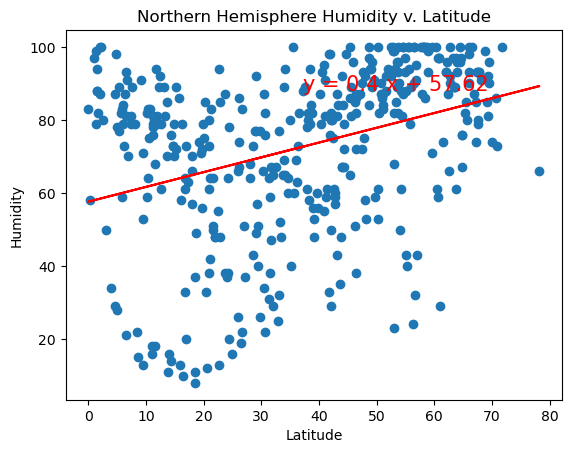

In [17]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
print(f"The r-value is: {rvalue}")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere Humidity v. Latitude")
plt.annotate(line_eq,(x.iloc[0],y.iloc[0]),fontsize=15,color="red")
plt.show()

The r-value is: 0.4236013213138269


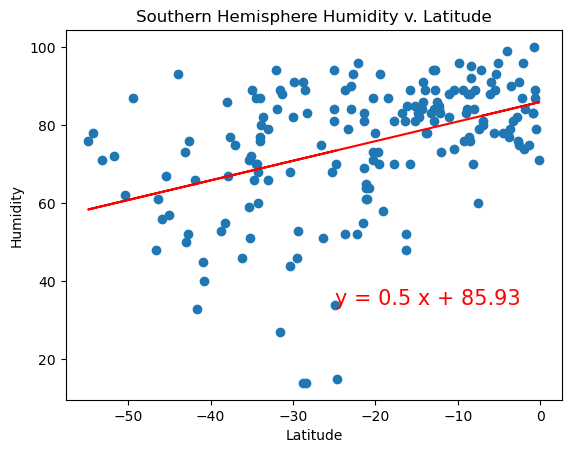

In [18]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
print(f"The r-value is: {rvalue}")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere Humidity v. Latitude")
plt.annotate(line_eq,(x.iloc[0],y.iloc[0]),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 

From the Southern Hemisphere graph, we see that the lower the latitude below 0, the lower the humidity. From the Northern Hemisphere graph, we see that the higher the latitude above 0, the higher the humidity.  There is a low positive correlation as latitude moves towards 0 and a low positive correlation as latitude moves above 0.

Conclusion: Because both south and north graphs have a low positive correlation, we can infer that the higher the measured latitude, the higher the himidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2828760447938141


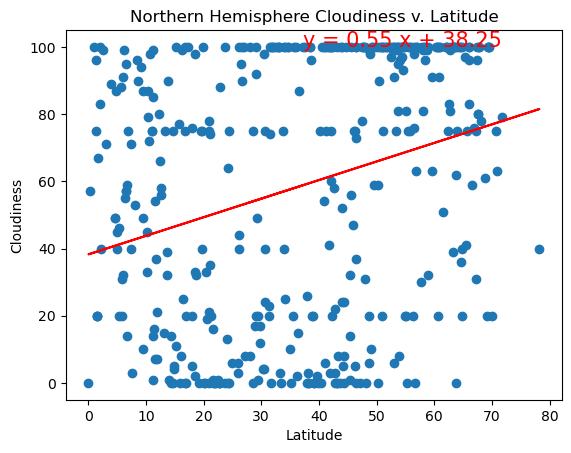

In [19]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
print(f"The r-value is: {rvalue}")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere Cloudiness v. Latitude")
plt.annotate(line_eq,(x.iloc[0],y.iloc[0]),fontsize=15,color="red")
plt.show()

The r-value is: 0.28677567792372266


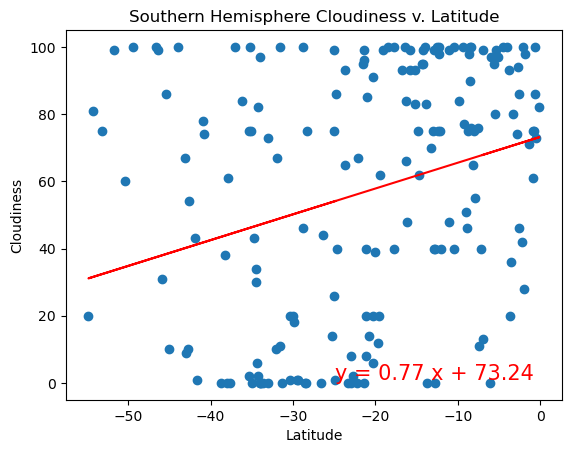

In [20]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
print(f"The r-value is: {rvalue}")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Cloudiness v. Latitude")
plt.annotate(line_eq,(x.iloc[0],y.iloc[0]),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 

From the Southern Hemisphere graph, we see that the lower the latitude below 0, the lower the cloudiness based on the regression line. From the Northern Hemisphere graph, we see that the higher the latitude above 0, the higher the cloudiness. There is a very low positive correlation as latitude moves towards 0 and a low positive correlation as latitude moves above 0.

Conclusion: Because both south and north graphs have a positive correlation, we can infer that the higher the measured latitude, the higher the humidity. However, the correlation is very weak. This may not be a good set of data to experiment with.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05712265084714546


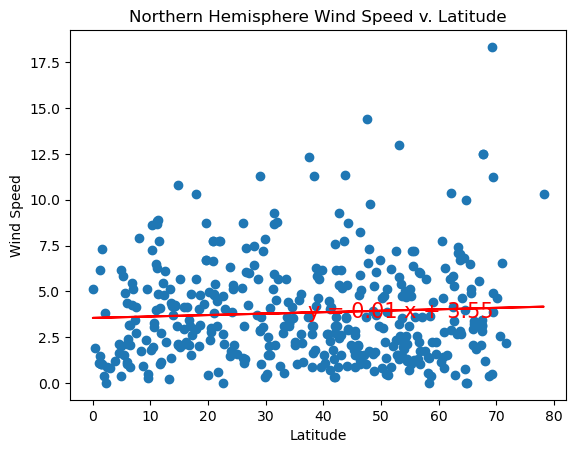

In [21]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
print(f"The r-value is: {rvalue}")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere Wind Speed v. Latitude")
plt.annotate(line_eq,(x.iloc[0],y.iloc[0]),fontsize=15,color="red")
plt.show()

The r-value is: -0.2637556029113139


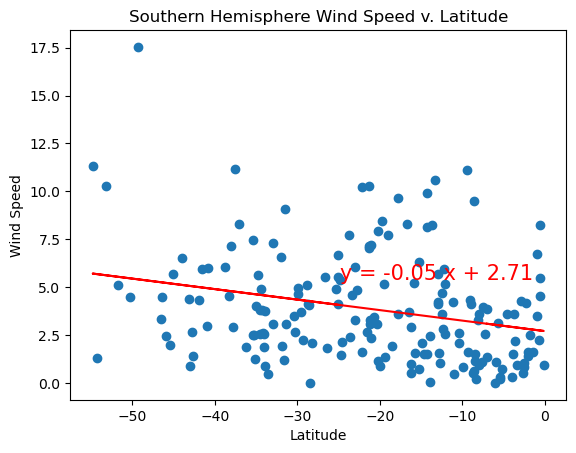

In [22]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
print(f"The r-value is: {rvalue}")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere Wind Speed v. Latitude")
plt.annotate(line_eq,(x.iloc[0],y.iloc[0]),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:**

From the Southern Hemisphere graph, we see that the lower the latitude below 0, the higher the wind speed based on the regression line. From the Northern Hemisphere graph, we see that the higher the latitude above 0, the higher the wind speed. There is a low negative correlation as latitude moves towards 0 and an EXTREMELY low positive correlation as latitude moves above 0.

Conclusion: Because the south graph shows a negative correlation, and the north graph shows a positive correlation, we can infer that the closer the city to the equator, the lower the wind speed. However, the correlation is extremely weak. This would not be a good set of data to experiment with.